## <font style="color:rgb(50,120,229)">Using Arithmetic Operations and Alpha Mask</font>
In order to put the bow on the bunnny:

1. Create an alpha mask with 3-channels using the single channel mask.
1. Extract the neck region from the rabbit
1. Multiply the Mask with the bow to get the masked bow
1. Multiply the negative of Mask with the neck region to create a hole in the neck region for the bow to be placed.
1. Add the masked bow and neck regions to get the combined region
1. Replace the neck region in the original image with that of the output we got in the previous step.


In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

Text(0.5, 1.0, 'Bow')

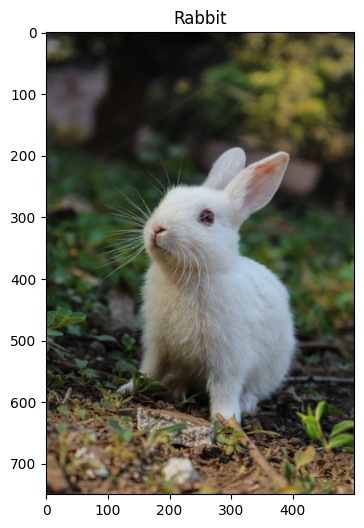

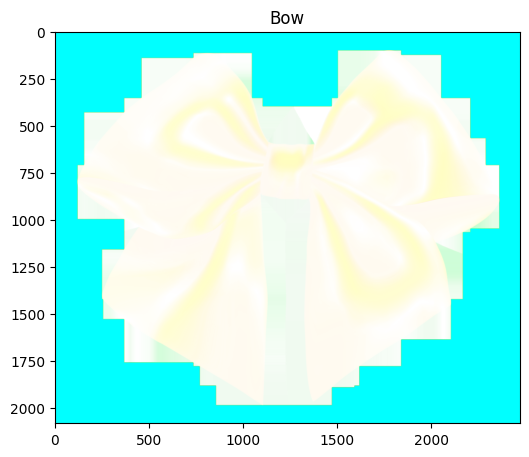

In [3]:
# Load the Rabbit Image
faceImagePath = "rabbit.jpeg"
faceImage = cv2.imread(faceImagePath)
faceImage = np.float32(faceImage)/255

plt.imshow(faceImage[:,:,::-1])
plt.title("Rabbit")

# Load the bow image with Alpha channel
bowimagePath = "bow.png"
bowPNG = cv2.imread(bowimagePath,-1)
bowPNG = np.float32(bowPNG)/255

plt.figure()
plt.imshow(bowPNG[:,:,::-1])
plt.title("Bow")



Bow dimension =(83, 99, 4)


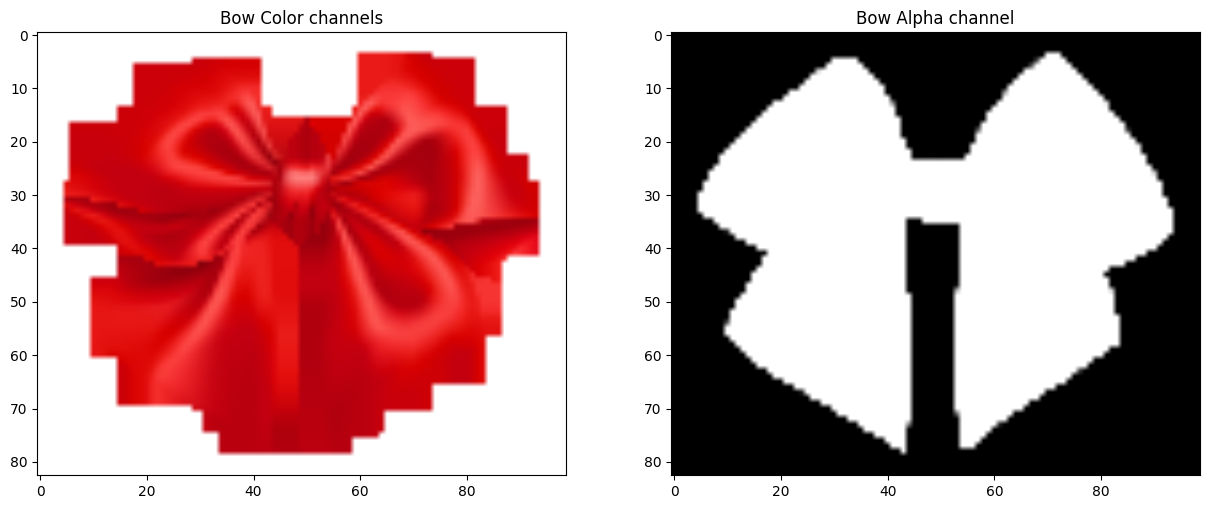

In [4]:
# Resize the image to fit over the neck region
bowPNG = cv2.resize(bowPNG, None, fx=0.04, fy=0.04)
bowHeight, bowWidth, nChannels = bowPNG.shape
print("Bow dimension ={}".format(bowPNG.shape))

# Separate the Color and alpha channels
bowBGR = bowPNG[:,:,0:3]
bowMask1 = bowPNG[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(bowBGR[:,:,::-1]); plt.title('Bow Color channels');
plt.subplot(122);plt.imshow(bowMask1,cmap='gray'); plt.title('Bow Alpha channel');

In [5]:
# Top left corner of the bow
topLeftRow = 380
topLeftCol = 160

bottomRightRow = topLeftRow + bowHeight
bottomRightCol = topLeftCol + bowWidth


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

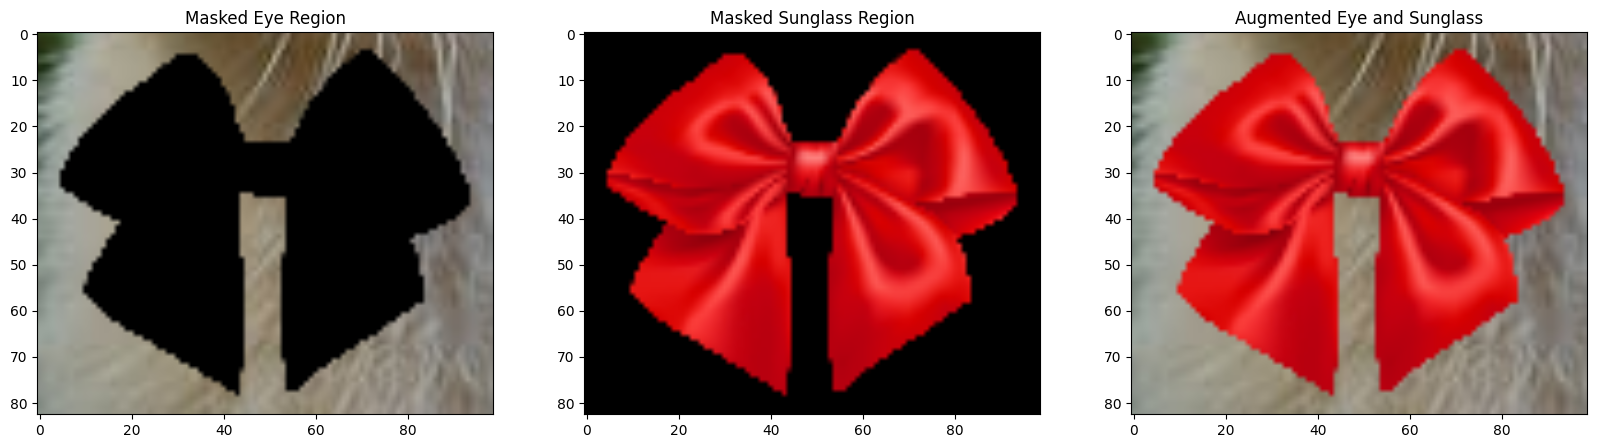

In [6]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
bowMask = cv2.merge((bowMask1,bowMask1,bowMask1))

# Make a copy
faceWithBowArithmetic = faceImage.copy()


# Get the eye region from the face image
neckROI= faceWithBowArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(neckROI,(1 -  bowMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(bowBGR, bowMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

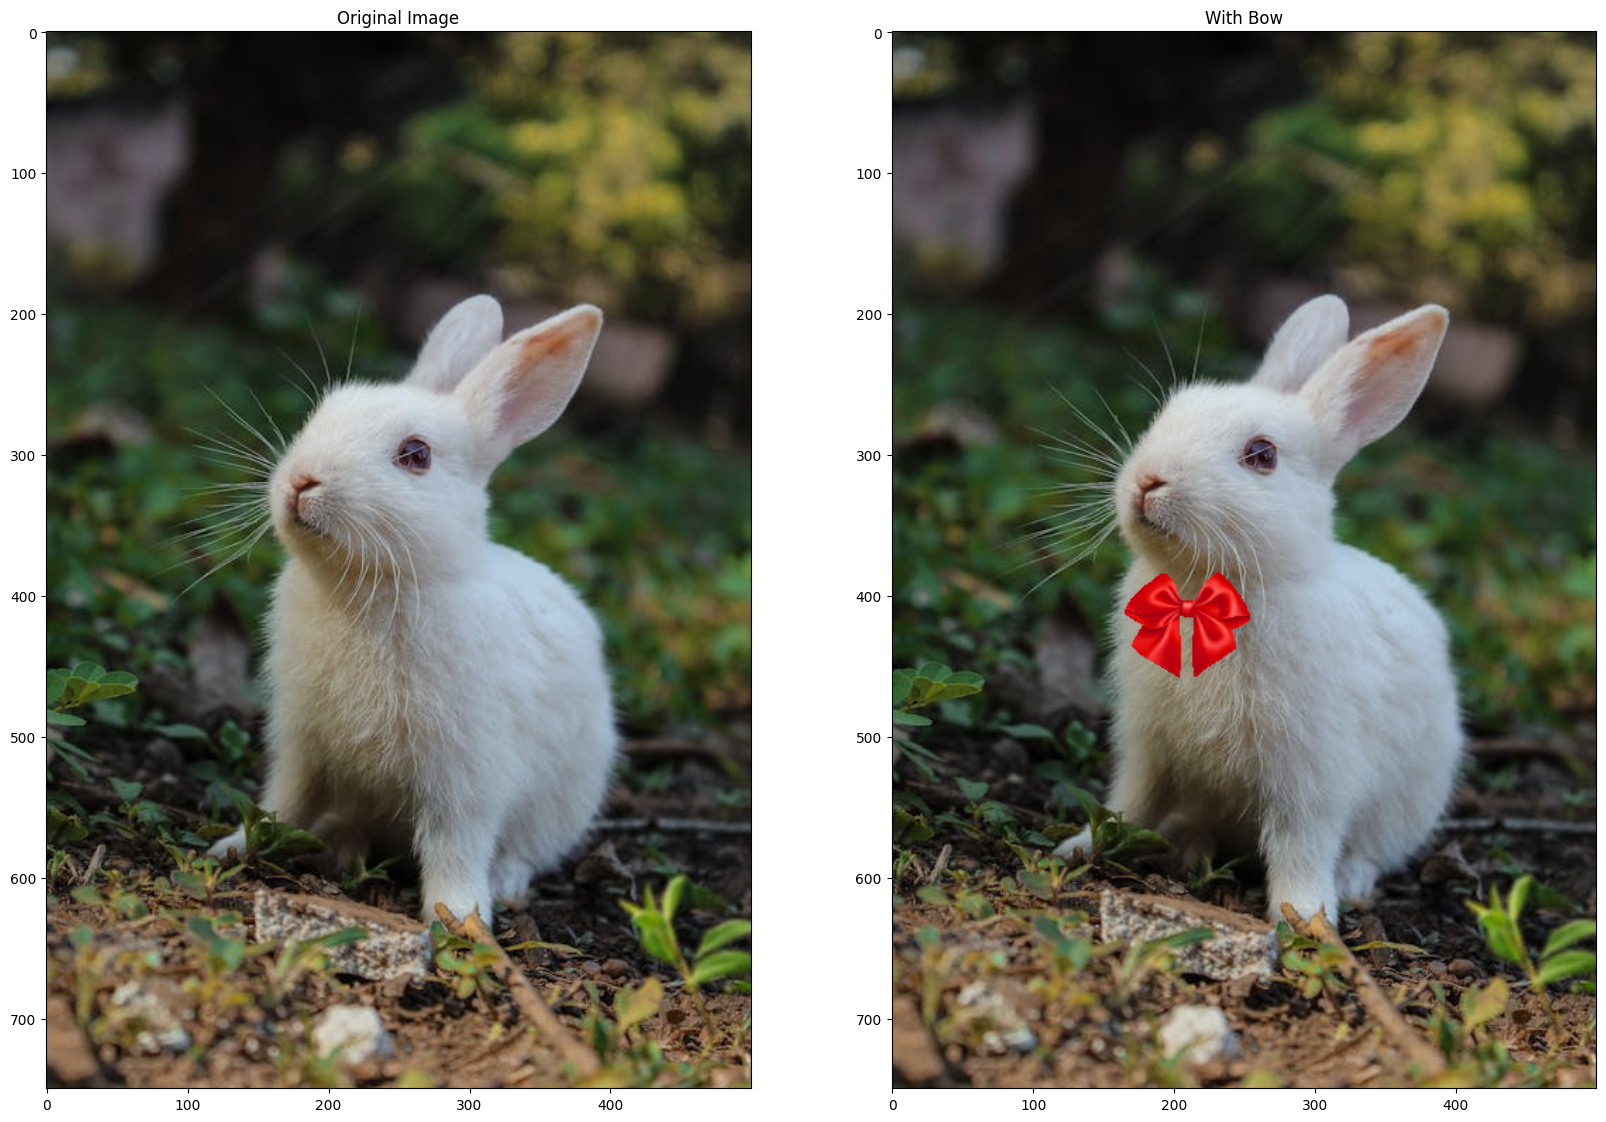

In [7]:
# Replace the eye ROI with the output from the previous section
faceWithBowArithmetic[topLeftRow:bottomRightRow,topLeftCol:bottomRightCol]= eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithBowArithmetic[:,:,::-1]);plt.title("With Bow");